In [2]:
import numpy as np
from PIL import Image

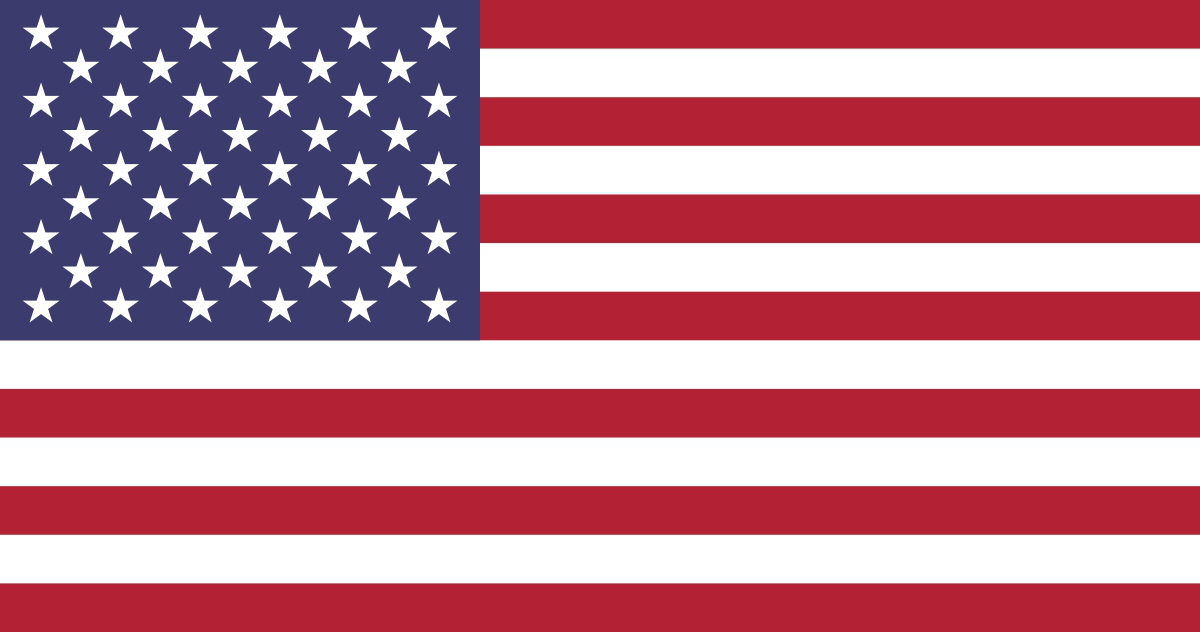

In [23]:
usa = Image.open('usa.jpg')
usa

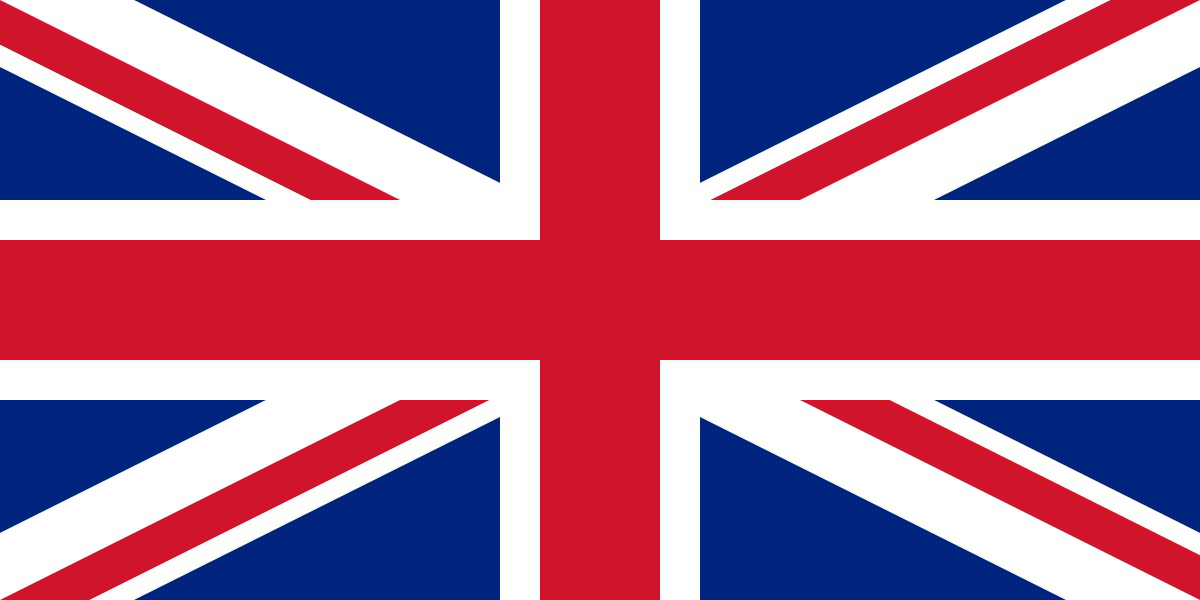

In [24]:
uk = Image.open('uk.jpg')
uk

In [25]:
def getY(pixel):
    return 0.2126*pixel[0]/255 + 0.7152*pixel[1]/255 + 0.0722*pixel[2]/255

def gray(Y):
    return [round(Y*255), round(Y*255), round(Y*255)]

In [36]:
usArr = np.array(usa)
ukArr = np.array(uk)
usGray = np.array(usa)
ukGray = np.array(uk)
sumUS = 0
sumUK = 0

for i in range(len(usArr)):
    for j in range(len(usArr[i])):
        alphaUS = getY(usArr[i][j])
        usGray[i][j] = gray(alphaUS)
        sumUS += alphaUS
        
for i in range(len(ukArr)):
    for j in range(len(ukArr[i])):
        alphaUK = getY(ukArr[i][j])
        ukGray[i][j] = gray(alphaUK)
        sumUK += alphaUK

In [106]:
def convolve(pic1, pic2, pic2AlphaSum):
    xLen = len(pic1[0]) + len(pic2[0])*2 - 2
    yLen = len(pic1) + len(pic2)*2 - 2
    minAddX = min(len(pic1[0]), len(pic2[0]))
    minAddY = min(len(pic1), len(pic2))
    res = np.zeros((xLen, yLen, 3))
    for i in range(xLen):
        for j in range(yLen):
            print(i,j)
            arr2 = (pic2[max(0, len(pic2[0])-i-1):min(len(pic2[0]), xLen-i),
                         max(0, len(pic2)-j-1):min(len(pic2), yLen-j), 0]/pic2AlphaSum)
            res[i][j][0] = np.sum(pic1[max(0,i-len(pic1[0])):min(len(pic1[0]),i+1),
                                       max(0,j-len(pic1)):min(len(pic1),j+1),0]*arr2)
            res[i][j][1] = np.sum(pic1[max(0,i-len(pic1[0])):min(len(pic1[0]),i+1),
                                       max(0,j-len(pic1)):min(len(pic1),j+1),1]*arr2)
            res[i][j][2] = np.sum(pic1[max(0,i-len(pic1[0])):min(len(pic1[0]),i+1),
                                       max(0,j-len(pic1)):min(len(pic1),j+1),2]*arr2)
    return res

In [107]:
mashup1 = Image.fromarray(convolve(usArr, ukGray, sumUK))
mashup1

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 87
0 88
0 89
0 90
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
0 100
0 101
0 102
0 103
0 104
0 105
0 106
0 107
0 108
0 109
0 110
0 111
0 112
0 113
0 114
0 115
0 116
0 117
0 118
0 119
0 120
0 121
0 122
0 123
0 124
0 125
0 126
0 127
0 128
0 129
0 130
0 131
0 132
0 133
0 134
0 135
0 136
0 137
0 138
0 139
0 140
0 141
0 142
0 143
0 144
0 145
0 146
0 147
0 148
0 149
0 150
0 151
0 152
0 153
0 154
0 155
0 156
0 157
0 158
0 159
0 160
0 161
0 162
0 163
0 164
0 165
0 166
0 167
0 168
0 169
0 170
0 171
0 172
0 173
0 174
0 175
0 176
0 177
0 178
0 179
0 180
0 181
0 182
0 183
0 184


ValueError: operands could not be broadcast together with shapes (1,601) (0,600) 

In [76]:
mashup2 = Image.fromarray(convolve(ukArr, usGray, sumUS))
mashup2

631 632


IndexError: index 0 is out of bounds for axis 0 with size 0